In [14]:
#data analysis and wrangling
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

#read data
df=pd.read_csv('~/Downloads/R_W_Wine_quality.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    Red  
1         9.8        5    Red  
2         9.8        5    Red  
3         9.8        6    Red  
4         9.4        5    Red  
...       ...      ...    ...  
6492     11.2        6  White  
6493      9.6        5  White  
6494      9.4        6  White  
6495     12.8        7  White  
6496     11.8        6  White  

[6497 rows x 13 columns]

In [142]:
!pip install tensorflow

C:\Users\Sf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

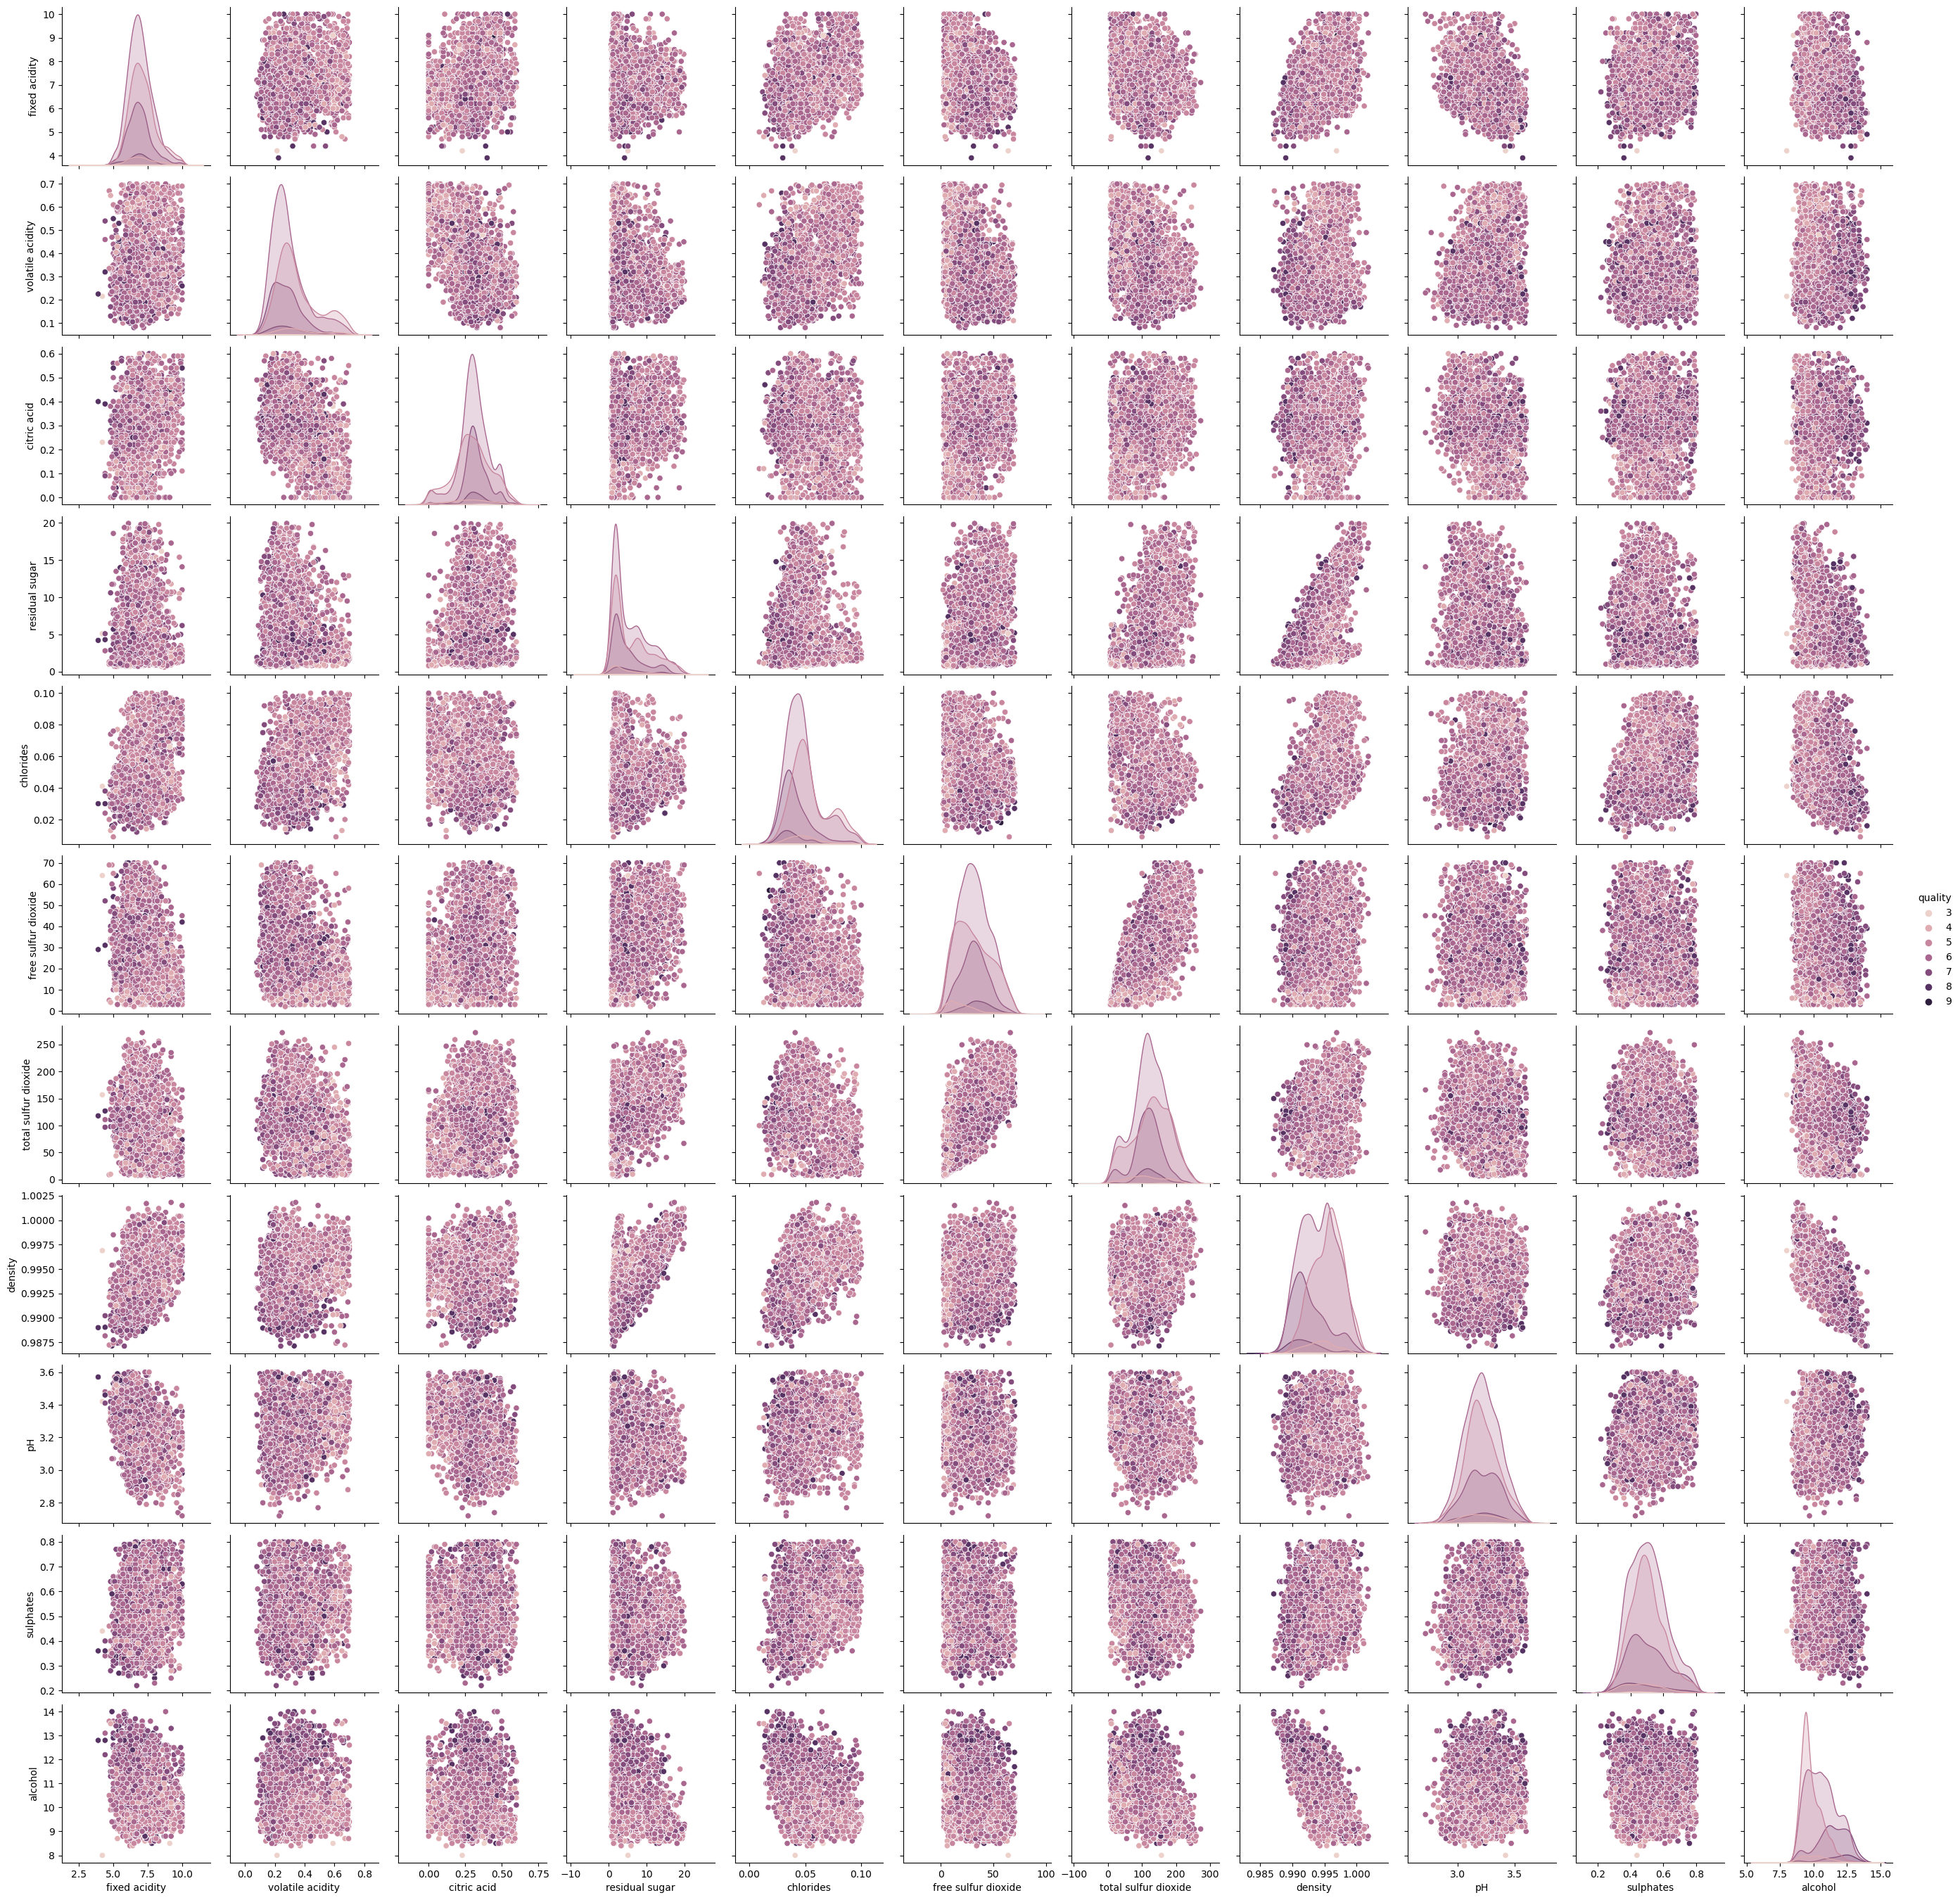

In [143]:
sns.pairplot(data=df, vars=('fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'),hue='quality')

In [145]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525473            115.744728     0.994697   
std       0.035034            17.749313             56.521751     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality         type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.492058     5.818378     0.246114  
std       0.160787     0.148806     1.192923     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

In [2]:
#preparing data frame
#splitting
X=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y=df[['quality','type']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197, 2)
(1300, 2)


In [3]:
#preparing data frame
#scaling
scaler=MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())


Max:  1.0000000000000002
Min:  0.0


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError  # For additional metric

# Load data
df = pd.read_csv('~/Downloads/R_W_Wine_quality.csv')

# Convert 'type' from categorical to numerical using binary method
df['type'] = df['type'].apply(lambda x: 1 if x == 'Red' else 0)

# Select features and target
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_quality = df['quality']
y_type = df['type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, df[['quality', 'type']], test_size=0.3, random_state=101)
y_train_quality = y_train['quality']
y_train_type = y_train['type']
y_test_quality = y_test['quality']
y_test_type = y_test['type']

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare model inputs and outputs
inputs = Input(shape=(X_train_scaled.shape[1],))
x = Dense(11, activation='sigmoid')(inputs)
x = Dense(64, activation='sigmoid')(x)

# Prepare separate outputs
output_quality = Dense(1, activation='linear', name='quality')(x)  # Ensure regression with linear activation
output_type = Dense(1, activation='sigmoid', name='type')(x)  # Sigmoid for binary classification

# Create the model
model = Model(inputs=inputs, outputs=[output_quality, output_type])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),  # Specified learning rate for clarity
              loss={'quality': MeanSquaredError(), 'type': BinaryCrossentropy()},
              metrics={'quality': MeanAbsoluteError(), 'type': 'accuracy'})

# Fit the model
history = model.fit(X_train_scaled, {'quality': y_train_quality, 'type': y_train_type},
                    validation_data=(X_test_scaled, {'quality': y_test_quality, 'type': y_test_type}),
                    epochs=100, batch_size=32)

# Evaluate the model
results = model.evaluate(X_test_scaled, {'quality': y_test_quality, 'type': y_test_type})
print(f'Test results - Loss: {results[0]}, Quality Mean Absolute Error: {results[1]}, Type Accuracy: {results[2]}')

# Training and validation loss history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Making predictions with the model
predictions = model.predict(X_test_scaled)
predicted_quality = np.round(predictions[0].flatten(), 1)  # rounding continuous output for quality to one decimal
predicted_type_prob = predictions[1].flatten()  # Sigmoid output for type, as probability
predicted_type = (predicted_type_prob > 0.5).astype(int)  # Converting probability to binary class

# Define a tolerance level for quality predictions
#tolerance = 0.5

# Calculate custom accuracy for quality predictions
#accurate_predictions = np.abs(predicted_quality - y_test_quality.to_numpy()) <= tolerance
#quality_accuracy = np.mean(accurate_predictions)

# Display predicted results and actual values
print("Predicted Results vs. Actual Values:")
for predicted_q, predicted_t, actual_q, actual_t in zip(predicted_quality, predicted_type, y_test_quality, y_test_type):
    predicted_type_str = 'Red' if predicted_t == 1 else 'White'
    actual_type_str = 'Red' if actual_t == 1 else 'White'
    print(f"Predicted Quality: {predicted_q}, Actual Quality: {actual_q}")
    print(f"Predicted Type: {predicted_type_str}, Actual Type: {actual_type_str}")

# Calculating accuracy for type prediction
correct_predictions = (predicted_type == y_test_type.to_numpy()).sum()
accuracy = correct_predictions / len(y_test_type)
print(f"Accuracy for Type Prediction: {accuracy:.4f}")
#print(f"Accuracy for Quality Prediction within ±{tolerance} tolerance: {quality_accuracy:.4f}")
#print(f"Accuracy for Quality Prediction:{quality_accuracy:4f}")

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 6.8670 - quality_mean_absolute_error: 1.7441 - type_accuracy: 0.7328 - val_loss: 1.3052 - val_quality_mean_absolute_error: 0.6848 - val_type_accuracy: 0.7441
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2999 - quality_mean_absolute_error: 0.6671 - type_accuracy: 0.7553 - val_loss: 1.2765 - val_quality_mean_absolute_error: 0.6772 - val_type_accuracy: 0.7441
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2189 - quality_mean_absolute_error: 0.6425 - type_accuracy: 0.7527 - val_loss: 1.1164 - val_quality_mean_absolute_error: 0.5967 - val_type_accuracy: 0.7441
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0589 - quality_mean_absolute_error: 0.5982 - type_accuracy: 0.7669 - val_loss: 0.9651 - val_quality_mean_absolute_error: 0.6015 - val_type_accuracy: 0.8744
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8995 - quality_mean_absolute_error: 0.5995 - type_accuracy: 

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicted Results vs. Actual Values:
Predicted Quality: 6.599999904632568, Actual Quality: 6
Predicted Type: Red, Actual Type: Red
Predicted Quality: 5.900000095367432, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 7.300000190734863, Actual Quality: 7
Predicted Type: White, Actual Type: White
Predicted Quality: 6.0, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 5.099999904632568, Actual Quality: 5
Predicted Type: White, Actual Type: White
Predicted Quality: 6.400000095367432, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 6.400000095367432, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 5.300000190734863, Actual Quality: 5
Predicted Type: White, Actual Type: White
Predicted Quality: 5.5, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 5.199999809265137, Actual Quality: 5
Predicted Type: Re

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error

def permutation_importance(model, X, y, metric, output_index=0, num_rounds=10):
    # Get the baseline performance with the actual data
    original_predictions = model.predict(X)
    if isinstance(original_predictions, list):
        original_performance = metric(y, original_predictions[output_index].flatten())
    else:
        original_performance = metric(y, original_predictions.flatten())
    
    feature_scores = {}

    for feature in X.columns:
        shuffled_performance = 0
        X_permuted = X.copy()

        for _ in range(num_rounds):  # Average over several shuffles
            X_permuted[feature] = np.random.permutation(X_permuted[feature])
            shuffled_predictions = model.predict(X_permuted)
            if isinstance(shuffled_predictions, list):  # Handling multi-output model
                shuffled_performance += metric(y, shuffled_predictions[output_index].flatten())
            else:
                shuffled_performance += metric(y, shuffled_predictions.flatten())

        shuffled_performance /= num_rounds
        feature_scores[feature] = original_performance - shuffled_performance

    return feature_scores

# Assuming `model` is already trained and `X_test_scaled` and `y_test_quality` are available
# Make sure to convert scaled data back to a DataFrame if it's not already
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

# Calculate feature importance for quality prediction
importance_scores = permutation_importance(model, X_test_scaled_df, y_test_quality, mean_squared_error, output_index=0)

# Print feature importance scores
for feature, score in sorted(importance_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
41/41 ━━━━━━━━━━━━━━━━━━━

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError  # For additional metric

# Load data
df = pd.read_csv('~/Downloads/R_W_Wine_quality.csv')

# Convert 'type' from categorical to numerical using binary method
df['type'] = df['type'].apply(lambda x: 1 if x == 'Red' else 0)

# Define thresholds for the features you want to filter
#thresholds = {
#    'residual sugar': 20,  # Example threshold for residual sugar
#    'free sulfur dioxide': 70,    # Example threshold for free sulfur dioxide
#    'total sulfur dioxide': 280,  # Example threshold for total sulfur dioxide
#    'chlorides': 0.1,       # Example threshold for chlorides
#    'fixed acidity':10,
#    'volatile acidity': 0.7,
#    'citric acid': 0.6,
#    'pH': 3.6,
#    'alcohol': 14.0,
#    'density': 1.01,
#    'sulphates': 0.8,}
# Filter out rows that exceed the thresholds
#for feature, threshold in thresholds.items():
#    df = df[df[feature] <= threshold]
    
# Select features and target
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_quality = df['quality']
y_type = df['type']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, df[['quality', 'type']], test_size=0.2, random_state=101)
y_train_quality = y_train['quality']
y_train_type = y_train['type']
y_test_quality = y_test['quality']
y_test_type = y_test['type']

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare model inputs and outputs
inputs = Input(shape=(X_train_scaled.shape[1],))
x = Dense(11, activation='sigmoid')(inputs)
x = Dense(64, activation='sigmoid')(x)

# Prepare separate outputs
output_quality = Dense(1, activation='linear', name='quality')(x)  # Ensure regression with linear activation
output_type = Dense(1, activation='sigmoid', name='type')(x)  # Sigmoid for binary classification

# Create the model
model = Model(inputs=inputs, outputs=[output_quality, output_type])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),  # Specified learning rate for clarity
             loss={'quality': MeanSquaredError(), 'type': BinaryCrossentropy()},
            metrics={'quality': MeanAbsoluteError(), 'type': 'accuracy'})
#adam_optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, decay=0.0, amsgrad=False)

#model.compile(optimizer=adam_optimizer,
              #loss={'quality': MeanSquaredError(), 'type': BinaryCrossentropy()},
              #metrics={'quality': MeanAbsoluteError(), 'type': 'accuracy'})

# Create the RMSprop optimizer with a specified learning rate
#rmsprop_optimizer = RMSprop(learning_rate=0.01)

# Compile the model with RMSprop
#model.compile(optimizer=rmsprop_optimizer, 
              #loss={'quality': MeanSquaredError(), 'type': BinaryCrossentropy()},
              #metrics={'quality': MeanAbsoluteError(), 'type': 'accuracy'})

# Fit the model
history = model.fit(X_train_scaled, {'quality': y_train_quality, 'type': y_train_type},
                    validation_data=(X_test_scaled, {'quality': y_test_quality, 'type': y_test_type}),
                    epochs=100, batch_size=32)

# Evaluate the model
results = model.evaluate(X_test_scaled, {'quality': y_test_quality, 'type': y_test_type})
print(f'Test results - Loss: {results[0]}, Quality Mean Absolute Error: {results[1]}, Type Accuracy: {results[2]}')

# Training and validation loss history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.figure(figsize=(10,6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Making predictions with the model
predictions = model.predict(X_test_scaled)
predicted_quality = np.round(predictions[0].flatten(), 1)  # rounding continuous output for quality to one decimal
predicted_type_prob = predictions[1].flatten()  # Sigmoid output for type, as probability
predicted_type = (predicted_type_prob > 0.5).astype(int)  # Converting probability to binary class

# Define a tolerance level for quality predictions
#tolerance = 0.5

# Calculate custom accuracy for quality predictions
#accurate_predictions = np.abs(predicted_quality - y_test_quality.to_numpy()) <= tolerance
#quality_accuracy = np.mean(accurate_predictions)

# Display predicted results and actual values
print("Predicted Results vs. Actual Values:")
for predicted_q, predicted_t, actual_q, actual_t in zip(predicted_quality, predicted_type, y_test_quality, y_test_type):
    predicted_type_str = 'Red' if predicted_t == 1 else 'White'
    actual_type_str = 'Red' if actual_t == 1 else 'White'
    print(f"Predicted Quality: {predicted_q}, Actual Quality: {actual_q}")
    print(f"Predicted Type: {predicted_type_str}, Actual Type: {actual_type_str}")

# Calculating accuracy for type prediction
correct_predictions = (predicted_type == y_test_type.to_numpy()).sum()
accuracy = correct_predictions / len(y_test_type)
print(f"Accuracy for Type Prediction: {accuracy:.4f}")
#print(f"Accuracy for Quality Prediction within ±{tolerance} tolerance: {quality_accuracy:.4f}")
#print(f"Accuracy for Quality Prediction:{quality_accuracy:4f}")

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 2.8786 - quality_mean_absolute_error: 0.9810 - type_accuracy: 0.6815 - val_loss: 1.3498 - val_quality_mean_absolute_error: 0.7245 - val_type_accuracy: 0.7469
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3262 - quality_mean_absolute_error: 0.6843 - type_accuracy: 0.7614 - val_loss: 1.3230 - val_quality_mean_absolute_error: 0.6642 - val_type_accuracy: 0.7469
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3186 - quality_mean_absolute_error: 0.6797 - type_accuracy: 0.7505 - val_loss: 1.3262 - val_quality_mean_absolute_error: 0.7005 - val_type_accuracy: 0.7469
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2959 - quality_mean_absolute_error: 0.6838 - type_accuracy: 0.7587 - val_loss: 1.3211 - val_quality_mean_absolute_error: 0.6652 - val_type_accuracy: 0.7469
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3283 - quality_mean_absolute_error: 0.6836 - type_accuracy: 

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Predicted Results vs. Actual Values:
Predicted Quality: 5.800000190734863, Actual Quality: 6
Predicted Type: White, Actual Type: Red
Predicted Quality: 5.800000190734863, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 7.0, Actual Quality: 7
Predicted Type: White, Actual Type: White
Predicted Quality: 5.599999904632568, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 5.599999904632568, Actual Quality: 5
Predicted Type: White, Actual Type: White
Predicted Quality: 6.099999904632568, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 6.199999809265137, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 5.300000190734863, Actual Quality: 5
Predicted Type: White, Actual Type: White
Predicted Quality: 5.699999809265137, Actual Quality: 6
Predicted Type: White, Actual Type: White
Predicted Quality: 4.900000095367432, Actual Quality: 5
Pr

In [103]:
len(df)

6497

In [135]:
import pandas as pd

# Load data
df = pd.read_csv('~/Downloads/R_W_Wine_quality.csv')

# Define your thresholds for the features you want to filter
thresholds = {
    'residual sugar': 20,  # Example threshold for residual sugar
    'free sulfur dioxide': 70,    # Example threshold for free sulfur dioxide
    'total sulfur dioxide': 280,  # Example threshold for total sulfur dioxide
    'chlorides': 0.1       # Example threshold for chlorides
}

# Filter out rows that exceed the thresholds
for feature, threshold in thresholds.items():
    df = df[df[feature] <= threshold]

df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    Red  
1         9.8        5    Red  
2         9.8        5    Red  
3         9.8        6    Red  
4         9.4        5    Red  
...       ...      ...    ...  
6492     11.2        6  White  
6493      9.6        5  White  
6494      9.4        6  White  
6495     12.8        7  White  
6496     11.8        6  White  

[6039 rows x 13 columns]

In [138]:
import pandas as pd

# Load data
df = pd.read_csv('~/Downloads/R_W_Wine_quality.csv')

# Define your thresholds for the features you want to filter
thresholds = {
    'residual sugar': 20,  # Example threshold for residual sugar
    'free sulfur dioxide': 70,    # Example threshold for free sulfur dioxide
    'total sulfur dioxide': 280,  # Example threshold for total sulfur dioxide
    'chlorides': 0.1,       # Example threshold for chlorides
    'fixed acidity':10,
    'volatile acidity': 0.7,
    
}

# Filter out rows that exceed the thresholds
for feature, threshold in thresholds.items():
    df = df[df[feature] <= threshold]

df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
5               7.4              0.66         0.00             1.8      0.075   
6               7.9              0.60         0.06             1.6      0.069   
7               7.3              0.65         0.00             1.2      0.065   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
6                    15.0                  59.0  0.99640  3.30       0.46   
7                    15.0                  21.0  0.99460  3.39       0.47   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    Red  
4         9.4        5    Red  
5         9.4        5    Red  
6         9.4        5    Red  
7        10.0        7    Red  
...       ...      ...    ...  
6492     11.2        6  White  
6493      9.6        5  White  
6494      9.4        6  White  
6495     12.8        7  White  
6496     11.8        6  White  

[5640 rows x 13 columns]

In [140]:
import pandas as pd

# Load data
df = pd.read_csv('~/Downloads/R_W_Wine_quality.csv')

# Define your thresholds for the features you want to filter
thresholds = {
    'residual sugar': 20,  # Example threshold for residual sugar
    'free sulfur dioxide': 70,    # Example threshold for free sulfur dioxide
    'total sulfur dioxide': 280,  # Example threshold for total sulfur dioxide
    'chlorides': 0.1,       # Example threshold for chlorides
    'fixed acidity':10,
    'volatile acidity': 0.7,
    'citric acid': 0.6,
    'pH': 3.6,
    'alcohol': 14.0,
    'density': 1.01,
    'sulphates': 0.8,
    
}

# Filter out rows that exceed the thresholds
for feature, threshold in thresholds.items():
    df = df[df[feature] <= threshold]

df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
4               7.4              0.70         0.00             1.9      0.076   
5               7.4              0.66         0.00             1.8      0.075   
6               7.9              0.60         0.06             1.6      0.069   
7               7.3              0.65         0.00             1.2      0.065   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
4                    11.0                  34.0  0.99780  3.51       0.56   
5                    13.0                  40.0  0.99780  3.51       0.56   
6                    15.0                  59.0  0.99640  3.30       0.46   
7                    15.0                  21.0  0.99460  3.39       0.47   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
0         9.4        5    Red  
4         9.4        5    Red  
5         9.4        5    Red  
6         9.4        5    Red  
7        10.0        7    Red  
...       ...      ...    ...  
6492     11.2        6  White  
6493      9.6        5  White  
6494      9.4        6  White  
6495     12.8        7  White  
6496     11.8        6  White  

[5271 rows x 13 columns]